## Init Tensor

In [1]:
import torch
import matplotlib.pyplot as plt


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

t = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float16, device=device, requires_grad=True)
print(t)
print(t.dtype)
print(t.device)
print(t.shape)
print(t.requires_grad)

Using cuda device
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', dtype=torch.float16,
       requires_grad=True)
torch.float16
cuda:0
torch.Size([2, 3])
True


## Common Init

In [3]:
# Initialize a tensor with empty
empty = torch.empty((2, 5), device=device)
print("Empty Tensor:")
print(empty)

# Initialize a tensor with zeros
zeros = torch.zeros((2, 5), device=device)
print("\nZeros Tensor:")
print(zeros)

# Initialize a tensor with ones
ones = torch.ones((2, 5), device=device)
print("\nOnes Tensor:")
print(ones)

# Initialize a tensor with random values
random = torch.rand((2, 5), device=device)
print("\nRandom Tensor:")
print(random)

# Initialize a tensor with IDE values
ide = torch.eye(4, 5)
print("\nIDE Tensor:")
print(ide)

# Initialize a diag tensor 
diag = torch.diag(torch.ones(3))
print("\nDiag Tensor:")
print(diag)

# Initialize a tensor with Aranged values
arange = torch.arange(start=0, end=15, step=1).reshape(3,5)
print("\nArange Tensor:")
print(arange)

# Initialize a tensor with LinSpace values
linspace = torch.linspace(start=0.0, end=1, steps=10).reshape(2,5)
print("\nLinspace Tensor:")
print(linspace)

# # Initialize a tensor with a specific value
# specific_value = torch.full((2, 5), 7, device=device)
# print("\nSpecific Value Tensor:")
# print(specific_value)

# # Initialize a tensor with values from a normal distribution
# normal = torch.randn((2, 5), device=device)
# print("\nNormal Distribution Tensor:")
# print(normal)

Empty Tensor:
tensor([[1., 2., 3., 4., 5.],
        [6., 0., 0., 0., 0.]], device='cuda:0')

Zeros Tensor:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')

Ones Tensor:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')

Random Tensor:
tensor([[0.9989, 0.6948, 0.6402, 0.2702, 0.2594],
        [0.9605, 0.5859, 0.6244, 0.3069, 0.4662]], device='cuda:0')

IDE Tensor:
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

Diag Tensor:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Arange Tensor:
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

Linspace Tensor:
tensor([[0.0000, 0.1111, 0.2222, 0.3333, 0.4444],
        [0.5556, 0.6667, 0.7778, 0.8889, 1.0000]])


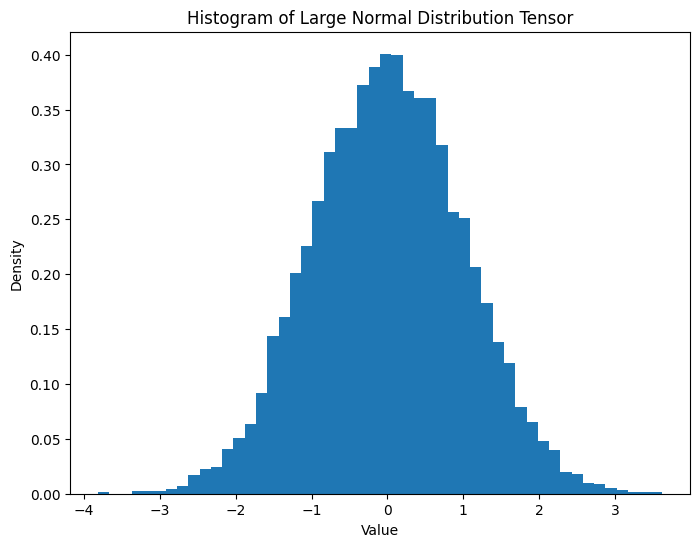

In [4]:
# Create a large tensor with values from a normal distribution
large_normal_tensor = torch.normal(mean=0.0, std=1.0, size=(10000,), device=device)

# Convert the tensor to a numpy array for plotting
large_normal_np = large_normal_tensor.cpu().numpy()

# Plot a histogram of the tensor values
plt.figure(figsize=(8, 6))
plt.hist(large_normal_np, bins=50, density=True)
plt.title('Histogram of Large Normal Distribution Tensor')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Convert

In [5]:
t = torch.arange(10, device=device)

# bool
print(t.bool())

# int
print(t.short())
print(t.long())  #int64

# float
print(t.half())
print(t.float()) #float32
print(t.double())

# array to tensor
import numpy as np 
np_array = np.zeros((5, 5))
tensor = torch.from_numpy(np_array)
np_array = tensor.numpy()

tensor([False,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       device='cuda:0')
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0', dtype=torch.int16)
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], device='cuda:0',
       dtype=torch.float16)
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], device='cuda:0')
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], device='cuda:0',
       dtype=torch.float64)


## Math & Comparison ops

In [6]:
x = torch.arange(10, device=device).reshape(2,5)
y = torch.where(x[x >= 5] % 2 == 0, 1, 0).detach().bool()
z = torch.ones(size=(2,5), device=device) * 2
print(x)
print(y)
print(z)


tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]], device='cuda:0')
tensor([False,  True, False,  True, False], device='cuda:0')
tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]], device='cuda:0')


In [7]:
# Addition
x_plus_z0 = torch.add(x, z)
x_plus_z1 = x + z
print(x_plus_z1)

# subtraction
x_minus_z0 = torch.subtract(x, z)
x_minus_z1 = x - z
print(x_minus_z1)

# division
x_div_z0 = torch.true_divide(x, z)
x_div_z1 = x / z
print(x_div_z0)

# multiplication (element wise)
x_times_z0 = torch.multiply(x, z)
x_times_z1 = x * z
print(x_times_z1)

tensor([[ 2.,  3.,  4.,  5.,  6.],
        [ 7.,  8.,  9., 10., 11.]], device='cuda:0')
tensor([[-2., -1.,  0.,  1.,  2.],
        [ 3.,  4.,  5.,  6.,  7.]], device='cuda:0')
tensor([[0.0000, 0.5000, 1.0000, 1.5000, 2.0000],
        [2.5000, 3.0000, 3.5000, 4.0000, 4.5000]], device='cuda:0')
tensor([[ 0.,  2.,  4.,  6.,  8.],
        [10., 12., 14., 16., 18.]], device='cuda:0')


In [8]:
# inplace operation 
t = torch.ones(size=(2,5), device=device)
t.add_(z)

# exponentiation
e0 = x.pow(2)
e1 = x ** 2
print(e1)

# filtering 
f0 = x[x >= 5]
print(f0)

# matrix multiplication
mm0 = torch.mm(z, z.T)
print(mm0)

# matrix multiplication (EXP)
m = torch.ones(size=(5, 5), device=device) * 2
m = m.matrix_power(3)
print(m)

# dot product
d = torch.dot(y.float(), y.float())
print(d)

# Batch Matrix multiplication
batch, n, m, p = 32, 10, 20, 30
t1 = torch.rand(size=(batch, n, m))
t2 = torch.rand(size=(batch, m, p))
bmm = torch.bmm(t1, t2) # (batch, n, p)


# Broadcasting
m1 = torch.arange(12).reshape(4, 3)
m2 = torch.tensor([2, 1, 2])
m3 = m1 - m2
m4 = m1 ** m2
print(m4)

tensor([[ 0,  1,  4,  9, 16],
        [25, 36, 49, 64, 81]], device='cuda:0')
tensor([5, 6, 7, 8, 9], device='cuda:0')
tensor([[20., 20.],
        [20., 20.]], device='cuda:0')
tensor([[200., 200., 200., 200., 200.],
        [200., 200., 200., 200., 200.],
        [200., 200., 200., 200., 200.],
        [200., 200., 200., 200., 200.],
        [200., 200., 200., 200., 200.]], device='cuda:0')
tensor(2., device='cuda:0')
tensor([[  0,   1,   4],
        [  9,   4,  25],
        [ 36,   7,  64],
        [ 81,  10, 121]])


In [9]:
t = torch.rand(size=(batch, n, m), device=device)
t = torch.arange(27, device=device).reshape(shape=(3,3,3))
print(t)

# sum
sum_d_0 = torch.sum(t, dim=0)
print(sum_d_0)

# max
max_d_0 = torch.max(t, dim=0)
print(max_d_0)

# min
min_d_0 = torch.min(t, dim=0)
print(min_d_0)

# abs
abs = torch.abs(t - 20)
print(abs)

# argmin & argmax
argmin_d_1 = torch.argmin(t, dim=1)
argmax_d_1 = torch.argmax(t, dim=1)
print(argmin_d_1)
print(argmax_d_1)

# mean
mean_d_0 = torch.mean(t.float(), dim=0)
print(mean_d_0)

# equivalent
eq = torch.eq(x, z)
print(eq)

# sorting
sort_d_0, indices = torch.sort(t, dim=0, descending=True)
print(sort_d_0)

# clamping
clmp = torch.clamp(t, min=8, max=18)
print(clmp)


tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]], device='cuda:0')
tensor([[27, 30, 33],
        [36, 39, 42],
        [45, 48, 51]], device='cuda:0')
torch.return_types.max(
values=tensor([[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]], device='cuda:0'),
indices=tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], device='cuda:0'))
torch.return_types.min(
values=tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]], device='cuda:0'),
indices=tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], device='cuda:0'))
tensor([[[20, 19, 18],
         [17, 16, 15],
         [14, 13, 12]],

        [[11, 10,  9],
         [ 8,  7,  6],
         [ 5,  4,  3]],

        [[ 2,  1,  0],
         [ 1,  2,  3],
         [ 4,  5,  6]]], device='cuda:0')
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], device=

## Indexing

In [10]:
x = torch.rand(size=(10,25), device=device)
y = torch.rand(size=(10, 1), device=device)
print(x.shape)
print(y.shape)

torch.Size([10, 25])
torch.Size([10, 1])


In [11]:
x[0, :]     # all columns of the first row
x[:, 0]     # all rows of the first column
x[2, 0:10]  # first 10 columns of the third row
x[0:5, 0:5] # first 5 rows and first 5 columns
x[0:5, :]   # first 5 rows and all columns  (same as x[0:5])
x[:, 0:5]   # all rows and first 5 columns  (same as x[0:5])
x[[2,5,8]]

tensor([[7.6540e-01, 3.4177e-01, 1.6270e-01, 9.8491e-01, 1.2819e-01, 2.4736e-01,
         6.3590e-01, 6.8374e-01, 9.3683e-01, 2.0753e-01, 9.0218e-01, 8.2310e-01,
         7.2805e-01, 3.3959e-01, 5.0946e-01, 9.6967e-02, 5.4847e-01, 8.7888e-01,
         3.0676e-01, 7.1881e-01, 4.4662e-02, 4.3083e-01, 7.1824e-01, 7.1896e-01,
         5.9811e-01],
        [5.2038e-01, 9.7253e-01, 2.9022e-01, 8.2371e-01, 7.1729e-01, 3.9536e-01,
         1.3380e-01, 2.5632e-01, 9.3851e-01, 5.9057e-01, 8.7979e-01, 5.0050e-01,
         8.7624e-01, 5.2483e-01, 5.3413e-01, 8.3794e-02, 9.8153e-01, 6.4696e-02,
         5.8417e-01, 3.0538e-01, 8.5984e-01, 1.3802e-02, 8.2345e-01, 7.5342e-01,
         2.4992e-01],
        [1.3870e-01, 8.1343e-01, 7.8852e-06, 2.9518e-01, 9.8579e-02, 8.0088e-01,
         6.1737e-01, 7.5637e-01, 5.3073e-01, 1.4222e-01, 1.4131e-01, 5.9701e-01,
         5.2852e-01, 8.6472e-01, 1.1968e-01, 6.4399e-01, 6.9804e-01, 4.8204e-01,
         7.8947e-01, 4.4187e-01, 8.7931e-01, 8.2265e-01, 3.0088e-

In [12]:
x = torch.arange(10)
print(x[(x < 2) | (x > 8)])
print(x[(x < 2) & (x > 8)])
print(x[x.remainder(2) == 0]) # modulo


tensor([0, 1, 9])
tensor([], dtype=torch.int64)
tensor([0, 2, 4, 6, 8])


In [13]:
print(torch.where(t > 5, t, torch.tensor(0.0, device=device)))
print(t.ndimension())
print(t.numel())
print(t.size())
print(t.shape)

tensor([[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 6.,  7.,  8.]],

        [[ 9., 10., 11.],
         [12., 13., 14.],
         [15., 16., 17.]],

        [[18., 19., 20.],
         [21., 22., 23.],
         [24., 25., 26.]]], device='cuda:0')
3
27
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])


## Reshaping

In [14]:
x = torch.arange(9, device=device)
x_3x3 = x.view(3, 3)
print(x_3x3)

y = x_3x3.t()
# print(y.view(9))
print(y.contiguous().view(9))

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]], device='cuda:0')
tensor([0, 3, 6, 1, 4, 7, 2, 5, 8], device='cuda:0')


In [15]:
x1 = torch.rand(size=(2, 5))
x2 = torch.rand(size=(2, 5))
x3 = torch.cat((x1, x2), dim=0)
print(x3.shape)

torch.Size([4, 5])


In [16]:
# flattern
print(x1.view(-1).shape)
print(t.view(3, -1).shape)

torch.Size([10])
torch.Size([3, 9])


In [17]:
z = t.permute(0, 2, 1)
print(t)
print(z)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]], device='cuda:0')
tensor([[[ 0,  3,  6],
         [ 1,  4,  7],
         [ 2,  5,  8]],

        [[ 9, 12, 15],
         [10, 13, 16],
         [11, 14, 17]],

        [[18, 21, 24],
         [19, 22, 25],
         [20, 23, 26]]], device='cuda:0')


In [18]:
x4 = torch.arange(10)
print(x4.shape)
print(x4.unsqueeze(0).shape)
print(x4.unsqueeze(1).shape)
print(x4.unsqueeze(1).unsqueeze(0).shape)
print(x4.unsqueeze(1).unsqueeze(0).squeeze(0).shape)

torch.Size([10])
torch.Size([1, 10])
torch.Size([10, 1])
torch.Size([1, 10, 1])
torch.Size([10, 1])
